In [2]:
import pandas as pd

df = pd.read_csv("../data/cleaned_dataset.csv")
df.head()


,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.80,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.10,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,tx2024scvz,3.90,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
3,us7000ndte,4.10,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,ci40731623,4.69,earthquake,"M 4.7 - 6 km N of Malibu, CA",2024-09-12T14:28:21,1726151301610,1726670314039,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,18592,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,quaint.pebbly.incline,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."


In [12]:
df.columns

Index(['type', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig',
       'nst', 'dmin', 'rms', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country', 'subnational',
       'locality', 'timezone', 'magnitude_class'],
      dtype='object')

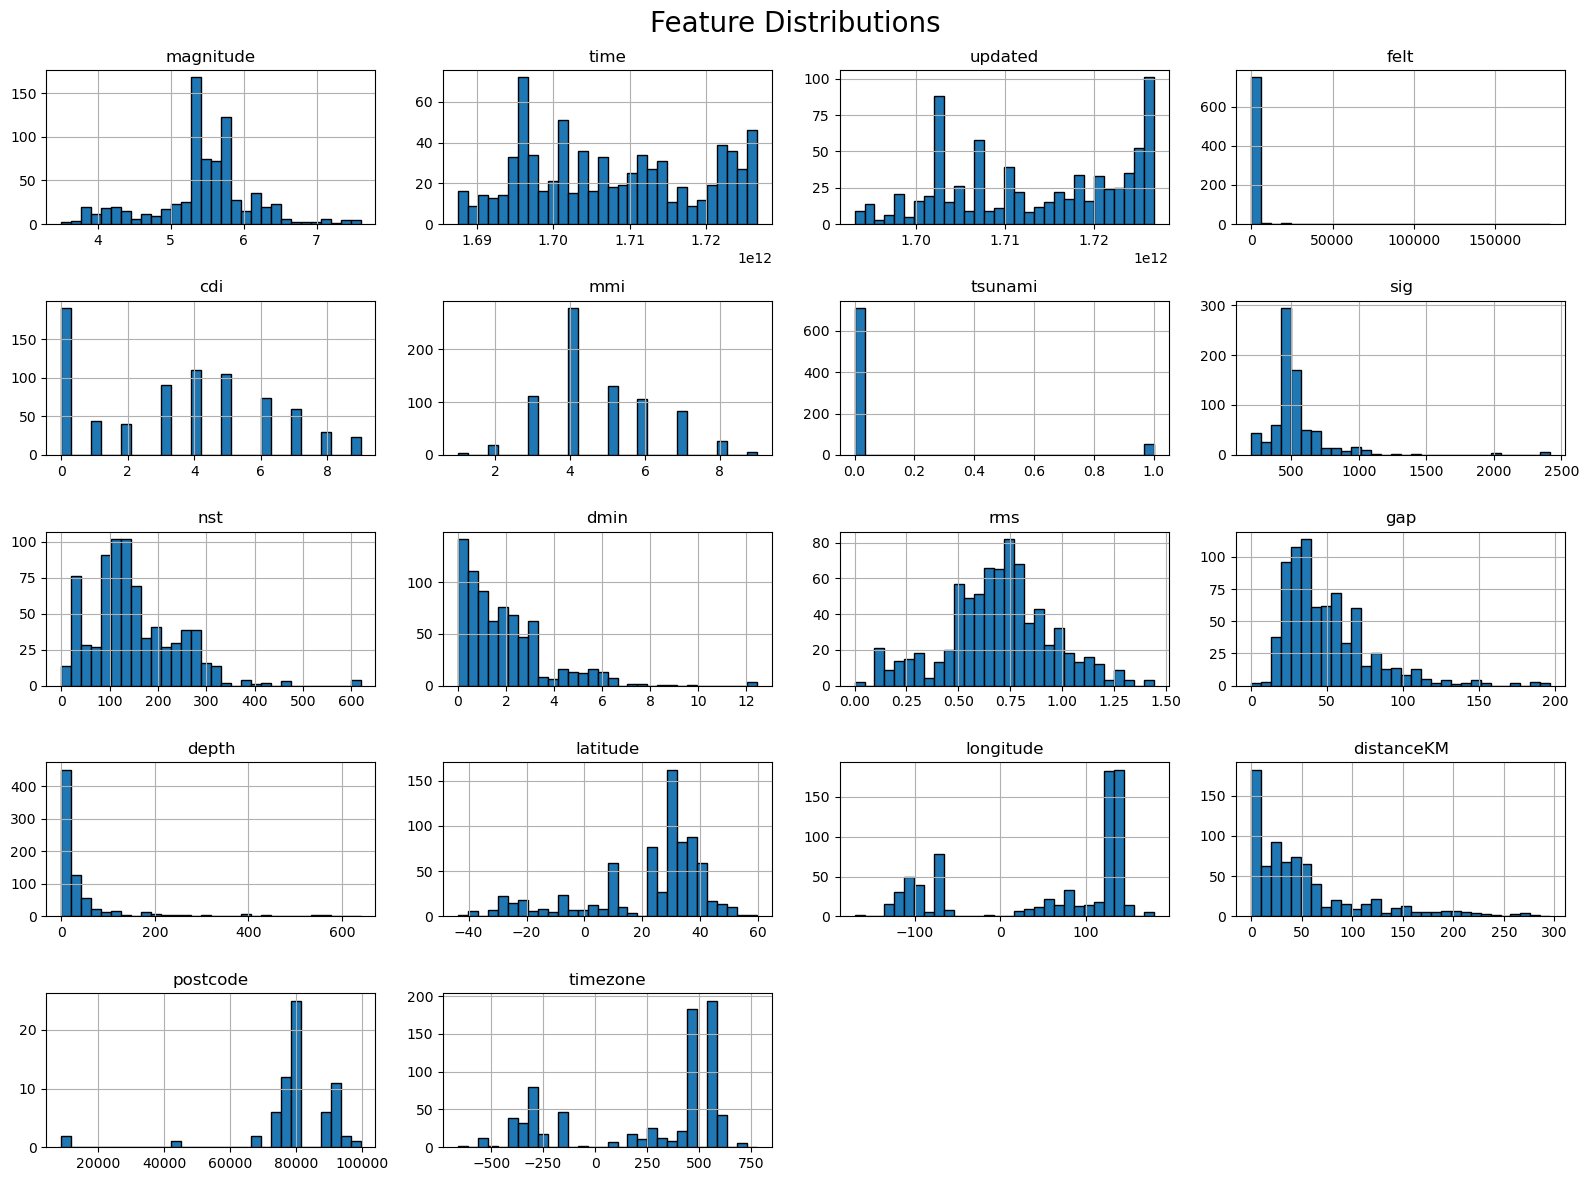

In [4]:
import matplotlib.pyplot as plt

df.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [5]:
# 1. Define your bins and labels
bins = [0, 3.9, 5.9, 10]  # adjust if your histogram suggests different cut‑points
labels = ["Low", "Medium", "High"]

# 2. Create the magnitude_class column
df["magnitude_class"] = pd.cut(df["magnitude"], bins=bins, labels=labels)

# 3. Check the distribution
print(df["magnitude_class"].value_counts())


magnitude_class
Medium    618
High      122
Low        24
Name: count, dtype: int64


In [ ]:
to_drop = [
    'id', 'magnitude',          # target + ID
    'title', 'url', 'detailUrl',
    'date', 'time', 'updated',
    'net', 'code', 'ids', 'sources',
    'types', 'geometryType',
    'place', 'placeOnly', 'distanceKM',
    'city', 'postcode',
    'what3words', 'locationDetails'
]
df = df.drop(columns=[c for c in to_drop if c in df.columns])


In [7]:
df.isna().sum()

type                 0
felt                 0
cdi                  0
mmi                  0
alert                0
status               0
tsunami              0
sig                  0
nst                  0
dmin                 0
rms                  0
gap                  0
magType              0
depth                0
latitude             0
longitude            0
location             0
continent            0
country            285
subnational          0
locality             0
timezone             0
magnitude_class      0
dtype: int64

In [9]:
# Fill categorical columns 'country' and 'city' with the mode placeholder "Unknown"
for col in ["country"]:
    df[col] = df[col].fillna("Unknown")

# Verify there are no more nulls (or see if any other columns still have missing data)
print(df.isnull().sum().loc[lambda x: x > 0])

Series([], dtype: int64)


In [11]:
df.columns

Index(['type', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig',
       'nst', 'dmin', 'rms', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country', 'subnational',
       'locality', 'timezone', 'magnitude_class'],
      dtype='object')

In [13]:
# Remove the 'status' column entirely
df = df.drop(columns=['status'])

# Now proceed with encoding:

# 1) One-hot encode low-cardinality columns
df = pd.get_dummies(df, columns=['tsunami'], prefix=['tsunami'])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of alert levels
alert_order = [['green', 'yellow', 'orange', 'red']]

# Initialize the encoder with the custom order
ord_enc = OrdinalEncoder(categories=alert_order)

# Ensure 'alert' is of type str and lowercase (to match the order list)
df['alert'] = df['alert'].astype(str).str.lower()

# Handle any unexpected values (e.g. 'nan' strings) by replacing them with 'green' or another fallback
df['alert'] = df['alert'].replace('nan', 'green')  # or 'unknown' if you added that earlier

# Apply encoding
df[['alert_encoded']] = ord_enc.fit_transform(df[['alert']])

# Drop original 'alert' column if you no longer need it
# df = df.drop(columns=['alert'])

# Check result
#print(df[['alert_encoded']])
#print(df[['alert']])

In [20]:
df.columns

Index(['type', 'felt', 'cdi', 'mmi', 'alert', 'sig', 'nst', 'dmin', 'rms',
       'gap', 'magType', 'depth', 'latitude', 'longitude', 'location',
       'continent', 'country', 'subnational', 'locality', 'timezone',
       'magnitude_class', 'tsunami_0', 'tsunami_1', 'alert_encoded'],
      dtype='object')

In [21]:

# 2) Label-encode the remaining categorical columns
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
for c in ['type','magType','continent','country','subnational','timezone']:
    df[c] = lbl.fit_transform(df[c])

# Verify
print(df.head())
print(df.dtypes.value_counts())


   type   felt  cdi  mmi  alert   sig  nst     dmin   rms    gap  ...  \
0     0   1893    6    5  green   994   37  0.28700  0.48   70.0  ...   
1     0   2042    6    5  green  1040   24  0.00000  0.10   38.0  ...   
2     0      5    3    4  green   236   38  0.00000  0.10   65.0  ...   
3     0      4    3    4  green   260   28  0.04300  0.26   67.0  ...   
4     0  18592    5    5  green   818  145  0.03238  0.29  101.0  ...   

                  location  continent  country  subnational  \
0           Ackerly, Texas          5       28           84   
1           Ackerly, Texas          5       28           84   
2  Whites City, New Mexico          5       28           84   
3  Whites City, New Mexico          5       28           84   
4               Malibu, CA          5       28            8   

              locality  timezone  magnitude_class  tsunami_0 tsunami_1  \
0       Tarzan-Lenorah         5           Medium       True     False   
1       Tarzan-Lenorah         5  

In [22]:
df.describe()

,type,felt,cdi,mmi,sig,nst,dmin,rms,gap,magType,depth,latitude,longitude,continent,country,subnational,timezone,alert_encoded
count,764.0,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,0.0,578.291885,3.477749,4.740838,533.821990,150.346859,1.900188,0.690652,49.584398,3.914921,53.396191,21.614721,53.576943,3.403141,21.467277,65.708115,15.624346,0.100785
std,0.0,7001.431395,2.675216,1.482394,250.574495,89.858160,1.819076,0.254313,29.058764,1.892065,103.097842,21.338523,101.748196,2.238655,9.578686,26.630177,7.702801,0.421007
min,0.0,0.000000,0.000000,1.000000,202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,-43.706400,-170.932000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,4.000000,449.000000,97.750000,0.581000,0.540000,30.000000,4.000000,10.000000,8.819125,-69.059200,1.000000,15.000000,45.000000,7.000000,0.000000
50%,0.0,5.000000,4.000000,4.000000,482.000000,131.000000,1.431000,0.700000,42.500000,5.000000,13.000000,29.910500,121.562000,5.000000,28.000000,84.000000,21.000000,0.000000
75%,0.0,32.000000,5.000000,6.000000,554.000000,197.000000,2.707750,0.840000,62.250000,5.000000,42.000000,35.666775,136.946000,5.000000,29.000000,84.000000,22.000000,0.000000
max,0.0,183786.000000,9.000000,9.000000,2419.000000,619.000000,12.457000,1.440000,197.000000,5.000000,639.503000,59.659100,179.972000,7.000000,30.000000,89.000000,25.000000,3.000000


In [26]:
from sklearn.preprocessing import StandardScaler

# Define the numeric columns to scale
numeric_cols = ['felt', 'cdi', 'mmi', 'nst', 'dmin', 'rms', 'gap',
                'depth', 'latitude', 'longitude', 'sig']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the full dataset
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [28]:
df

,type,felt,cdi,mmi,alert,sig,nst,dmin,rms,gap,...,location,continent,country,subnational,locality,timezone,magnitude_class,tsunami_0,tsunami_1,alert_encoded
0,0,0.187900,0.943439,0.174941,green,1.837695,-1.262224,-0.887398,-0.828861,0.703023,...,"Ackerly, Texas",5,28,84,Tarzan-Lenorah,5,Medium,True,False,0.0
1,0,0.209195,0.943439,0.174941,green,2.021393,-1.406991,-1.045274,-2.324059,-0.398915,...,"Ackerly, Texas",5,28,84,Tarzan-Lenorah,5,Medium,True,False,0.0
2,0,-0.081936,-0.178700,-0.500085,green,-1.189335,-1.251088,-1.045274,-2.324059,0.530845,...,"Whites City, New Mexico",5,28,84,Van Horn,5,Low,True,False,0.0
3,0,-0.082079,-0.178700,-0.500085,green,-1.093493,-1.362447,-1.021620,-1.694502,0.599716,...,"Whites City, New Mexico",5,28,84,Van Horn,5,Medium,True,False,0.0
4,0,2.574546,0.569393,0.174941,green,1.134849,-0.059542,-1.027462,-1.576460,1.770526,...,"Malibu, CA",5,28,8,Agoura Hills-Malibu,3,Medium,False,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0,-0.081078,2.065579,2.200021,orange,1.901590,1.042916,2.202456,-0.750166,-0.226737,...,"Zindah Jān, Afghanistan",1,0,25,Zendeh Jan District,14,High,True,False,2.0
760,0,-0.082650,-1.300840,1.524994,yellow,0.463950,0.163177,2.177152,-0.868208,0.152054,...,"Zindah Jān, Afghanistan",1,0,25,Zendeh Jan District,14,Medium,True,False,1.0
761,0,-0.079935,1.691532,2.200021,orange,1.917564,1.432674,2.184853,-0.435387,-0.226737,...,"Zindah Jān, Afghanistan",1,0,25,Zendeh Jan District,14,High,True,False,2.0
762,0,-0.063928,1.691532,1.524994,green,0.284245,0.842469,1.116579,-1.419071,-0.915449,...,"Dipayal, Nepal",1,19,76,JayaPrithvi-03,17,Medium,True,False,0.0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler  # or whichever scaler you prefer

# 1. Define y from the existing column
y = df['magnitude_class']


In [39]:
# Define your own mapping
mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply it
y = y.map(mapping)

print(y.unique())  # should be [0,1,2]

[1, 0, 2]
Categories (3, int64): [0 < 1 < 2]


In [55]:

# 2. Define X by dropping columns that leak or are redundant
X = df.drop(columns=[
    'magnitude_class',  # target
    'location', 'locality',       # free‑text
    #'tsunami_0', 'tsunami_1',     # post‑quake flags
    'alert', 
    #'alert_encoded'      # leaks magnitude severity
])


In [64]:

# 3. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)


In [65]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,754,755,756,757,758,759,760,761,762,763
type,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
felt,0.1879,0.209195,-0.081936,-0.082079,2.574546,-0.081936,-0.048206,-0.080935,-0.078363,-0.081364,...,-0.08165,-0.08265,-0.078649,-0.074933,-0.082222,-0.081078,-0.08265,-0.079935,-0.063928,-0.079077
cdi,0.943439,0.943439,-0.1787,-0.1787,0.569393,-0.1787,0.569393,-0.1787,0.195346,0.195346,...,0.195346,-1.30084,1.691532,1.317486,0.569393,2.065579,-1.30084,1.691532,1.691532,0.569393
mmi,0.174941,0.174941,-0.500085,-0.500085,0.174941,-0.500085,0.174941,-0.500085,-0.500085,-0.500085,...,1.524994,1.524994,2.200021,2.200021,1.524994,2.200021,1.524994,2.200021,1.524994,-0.500085
sig,1.837695,2.021393,-1.189335,-1.093493,1.134849,-1.237257,-0.542397,-1.185342,-0.945735,-0.981676,...,-0.262856,0.46395,1.953505,6.002856,0.471937,1.90159,0.46395,1.917564,0.284245,-0.011269
nst,-1.262224,-1.406991,-1.251088,-1.362447,-0.059542,-1.317904,-0.326805,-1.51835,-1.529486,-1.317904,...,-0.259989,-0.438164,-0.282261,3.036249,0.853605,1.042916,0.163177,1.432674,0.842469,0.67543
dmin,-0.887398,-1.045274,-1.045274,-1.02162,-1.027462,-0.990265,-1.039853,-1.012269,-1.007868,-0.862644,...,0.466373,1.508243,2.094639,1.509893,2.150748,2.202456,2.177152,2.184853,1.116579,0.245787
rms,-0.828861,-2.324059,-2.324059,-1.694502,-1.57646,-1.930586,-2.324059,-1.995115,-2.07263,0.076128,...,-0.041914,0.469601,0.902422,0.03678,-0.39604,-0.750166,-0.868208,-0.435387,-1.419071,0.745032
gap,0.703023,-0.398915,0.530845,0.599716,1.770526,0.565281,-1.122062,0.177536,-0.287344,1.322863,...,-0.398915,-0.949884,-0.98432,-0.98432,-0.226737,-0.226737,0.152054,-0.226737,-0.915449,-1.190933
magType,5,1,1,0,2,1,2,1,1,4,...,5,5,5,5,5,5,0,5,5,5


In [66]:

# Quick check
print("X_train shape:", X_train.shape)
print("Columns used:", X_train.columns.tolist())


X_train shape: (534, 20)
Columns used: ['type', 'felt', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'rms', 'gap', 'magType', 'depth', 'latitude', 'longitude', 'continent', 'country', 'subnational', 'timezone', 'tsunami_0', 'tsunami_1', 'alert_encoded']


In [68]:
from imblearn.over_sampling import SMOTE

# 1) Oversample the training data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Resampled training class distribution:")
print(y_res.value_counts())  # should now be balanced

Resampled training class distribution:
magnitude_class
0    432
1    432
2    432
Name: count, dtype: int64


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# === 🏋️‍♂️ TRAIN MODELS ===
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}

trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained successfully.")


Random Forest trained successfully.
Decision Tree trained successfully.
SVM trained successfully.
KNN trained successfully.



=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.98      0.99      0.98       186
           2       0.95      0.95      0.95        37

    accuracy                           0.97       230
   macro avg       0.97      0.88      0.92       230
weighted avg       0.97      0.97      0.97       230



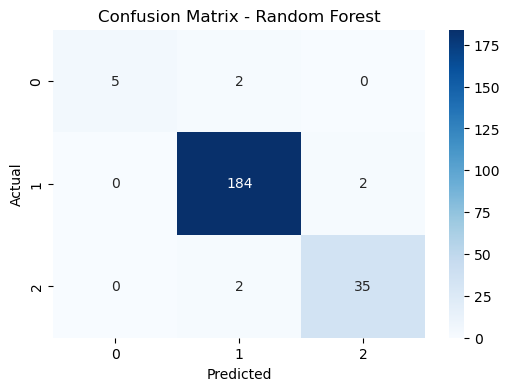


=== Decision Tree ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.98      0.99      0.98       186
           2       0.94      0.89      0.92        37

    accuracy                           0.97       230
   macro avg       0.97      0.96      0.97       230
weighted avg       0.97      0.97      0.97       230



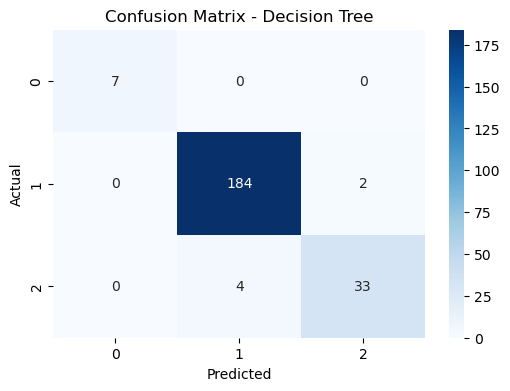


=== SVM ===
              precision    recall  f1-score   support

           0       0.14      0.86      0.24         7
           1       0.83      0.48      0.61       186
           2       0.23      0.51      0.32        37

    accuracy                           0.50       230
   macro avg       0.40      0.62      0.39       230
weighted avg       0.71      0.50      0.55       230



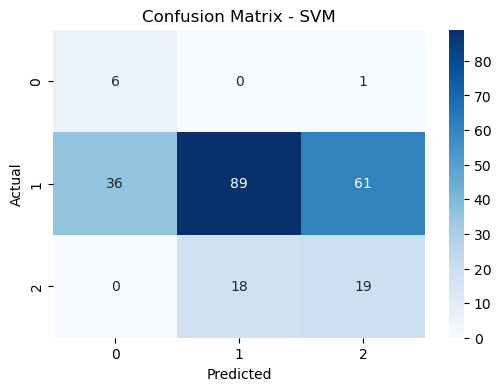


=== KNN ===
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.89      0.95      0.92       186
           2       0.71      0.46      0.56        37

    accuracy                           0.86       230
   macro avg       0.74      0.71      0.71       230
weighted avg       0.85      0.86      0.85       230



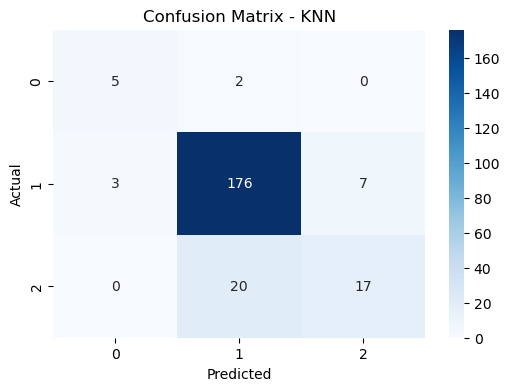

In [70]:

# === 📊 EVALUATE MODELS ===
y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
metrics_summary = []

for name, model in trained_models.items():
    print(f"\n=== {name} ===")
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    try:
        y_prob = model.predict_proba(X_test)
        roc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    except:
        roc = None

    metrics_summary.append({
        'Model': name, 'Accuracy': acc, 'Precision': prec,
        'Recall': rec, 'F1-score': f1, 'ROC-AUC': roc
    })

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [71]:

# === 📋 SUMMARY TABLE ===
summary_df = pd.DataFrame(metrics_summary)
print("\n=== Model Comparison Summary ===")
print(summary_df.set_index('Model').round(3))



=== Model Comparison Summary ===
               Accuracy  Precision  Recall  F1-score  ROC-AUC
Model                                                        
Random Forest     0.974      0.975   0.883     0.921    0.997
Decision Tree     0.974      0.974   0.960     0.967    0.963
SVM               0.496      0.403   0.616     0.391    0.742
KNN               0.861      0.741   0.707     0.714    0.844


           Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0  Random Forest     0.974      0.975   0.883     0.921    0.997
1  Decision Tree     0.974      0.974   0.960     0.967    0.963
2            SVM     0.496      0.403   0.616     0.391    0.742
3            KNN     0.861      0.741   0.707     0.714    0.844
           Model     Metric  Score
0  Random Forest   Accuracy  0.974
1  Decision Tree   Accuracy  0.974
2            SVM   Accuracy  0.496
3            KNN   Accuracy  0.861
4  Random Forest  Precision  0.975


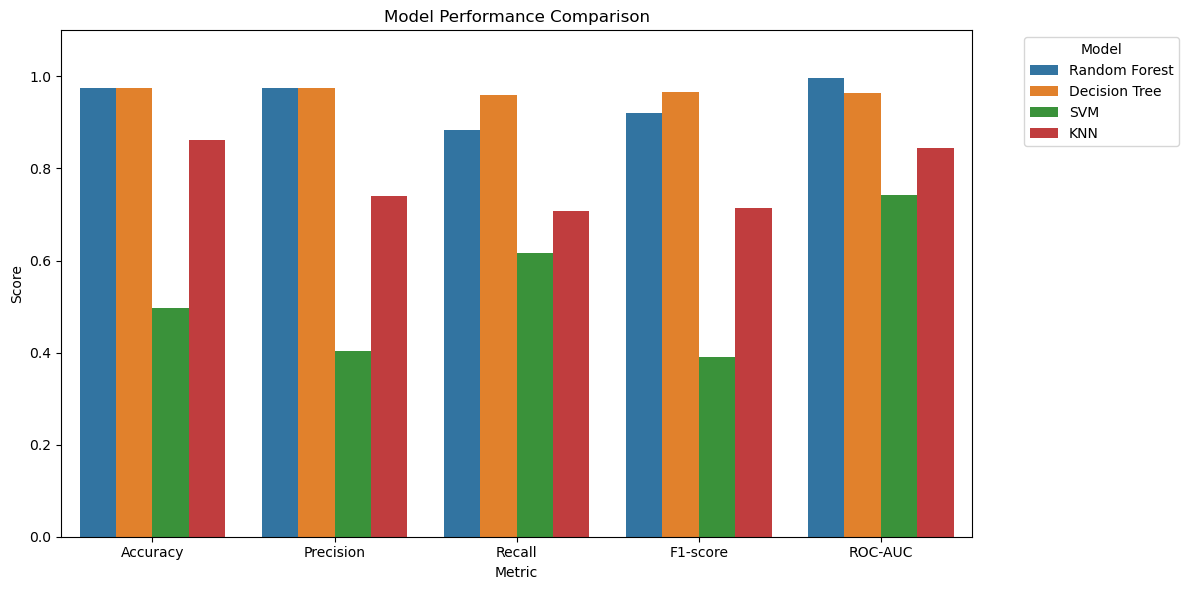

In [73]:

# === Model performance summary (from evaluation results) ===
performance_data = {
    'Model': ['Random Forest', 'Decision Tree', 'SVM', 'KNN'],
    'Accuracy': [0.974, 0.974, 0.496, 0.861],
    'Precision': [0.975, 0.974, 0.403, 0.741],
    'Recall': [0.883, 0.960, 0.616, 0.707],
    'F1-score': [0.921, 0.967, 0.391, 0.714],
    'ROC-AUC': [0.997, 0.963, 0.742, 0.844]
}


# Convert to DataFrame
df_perf = pd.DataFrame(performance_data)
print(df_perf.head())

# Melt for seaborn plotting
df_melted = df_perf.melt(id_vars='Model', var_name='Metric', value_name='Score')
print(df_melted.head())

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.1)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


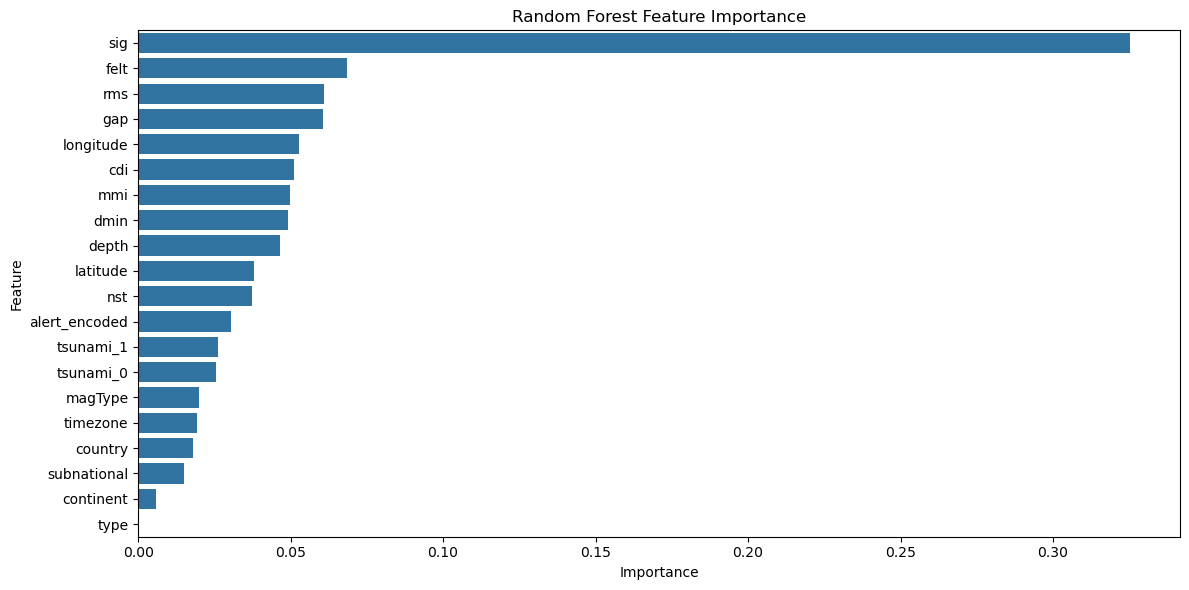

In [74]:
# Assume rf_model is your trained Random Forest model
# And X_train is your training data (after preprocessing)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


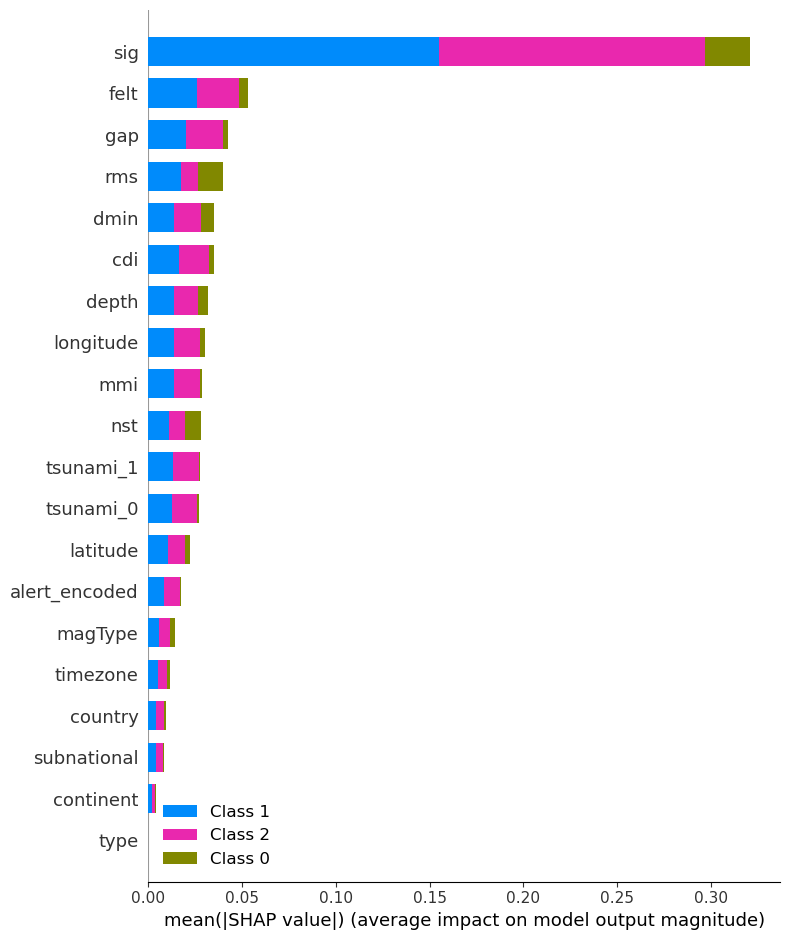

In [75]:
import shap

# Create SHAP explainer for Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# Summary plot for class-wise contribution (for multiclass)
shap.summary_plot(shap_values, X_train, plot_type="bar")


<Figure size 640x480 with 0 Axes>

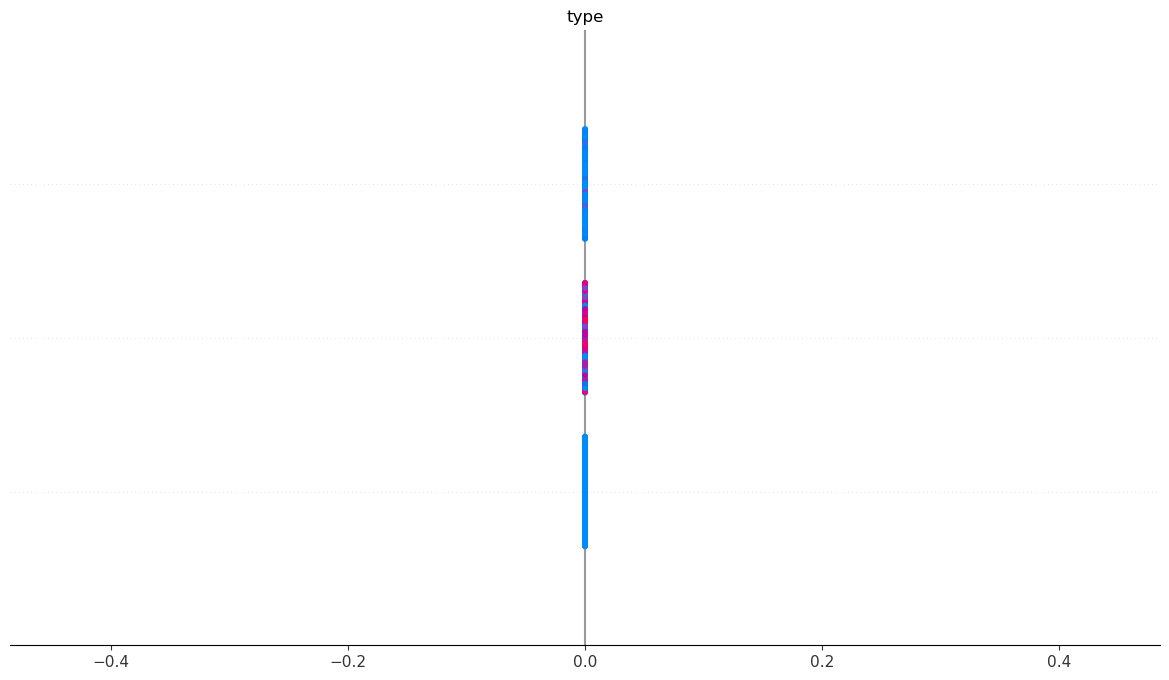

In [76]:
shap.summary_plot(shap_values, X_train)